In [2]:
import sys

sys.path.append('../')

from ride_pfa.heuristics import angle_clustering, radial_clustering, spherical_medoids

In [3]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from sklearn.metrics import pairwise_distances

# Angle clustering

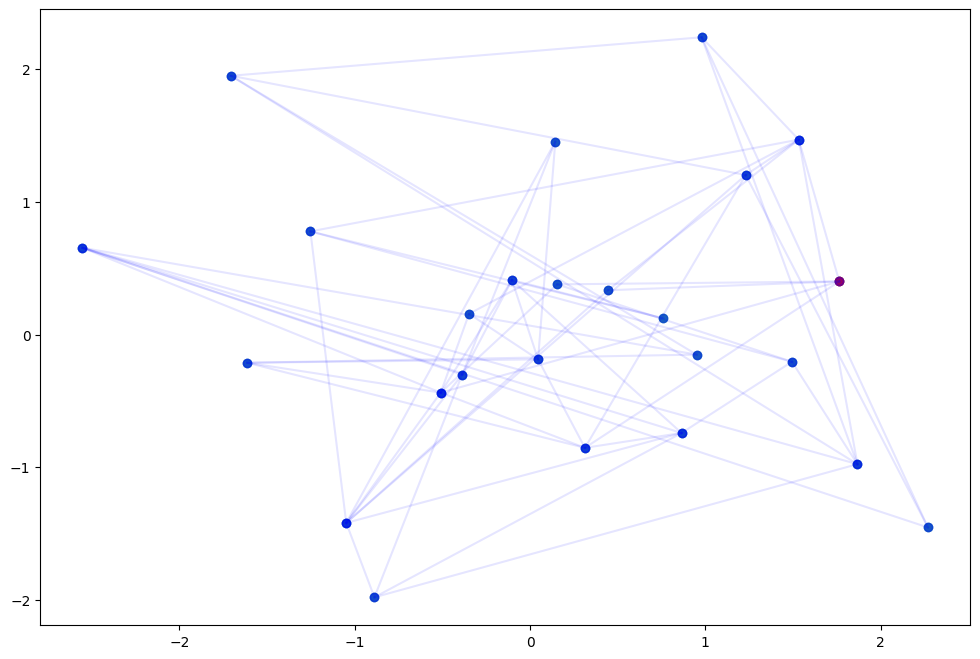

In [4]:
np.random.seed(0)

# Generate points
N = 25
link_prob = 0.1
points = np.random.randn(N, 2)
d_matrix = pairwise_distances(points)
# Null some edges
shape = (len(d_matrix), len(d_matrix))  
mask = np.random.rand(*shape) > link_prob
d_matrix[mask] = 0

# Build graph
G = nx.from_numpy_array(d_matrix)
for i, node in enumerate(G.nodes()):
    G.nodes[node]['x'] = points[i][0]
    G.nodes[node]['y'] = points[i][1]

central_id = next(iter(G.nodes))
end_points = [n for n in G.nodes if n != central_id]

plt.figure(figsize=(12, 8))
plt.scatter(points[:,0], points[:,1])

for i, j in G.edges:
    x_coords = [points[i][0], points[j][0]]
    y_coords = [points[i][1], points[j][1]]
    plt.plot(x_coords, y_coords, marker='o', c='blue', alpha=0.1)

plt.scatter(points[central_id,0], points[central_id,1], c='r')

In [5]:
angle_clustering(G, central_id, end_points)
partition = {}

for node in end_points:
    label = G.nodes[node]['angle_cluster']
    if label != -1:
        if label in partition:
            partition[label].append(node)
        else:
            partition[label] = [node]

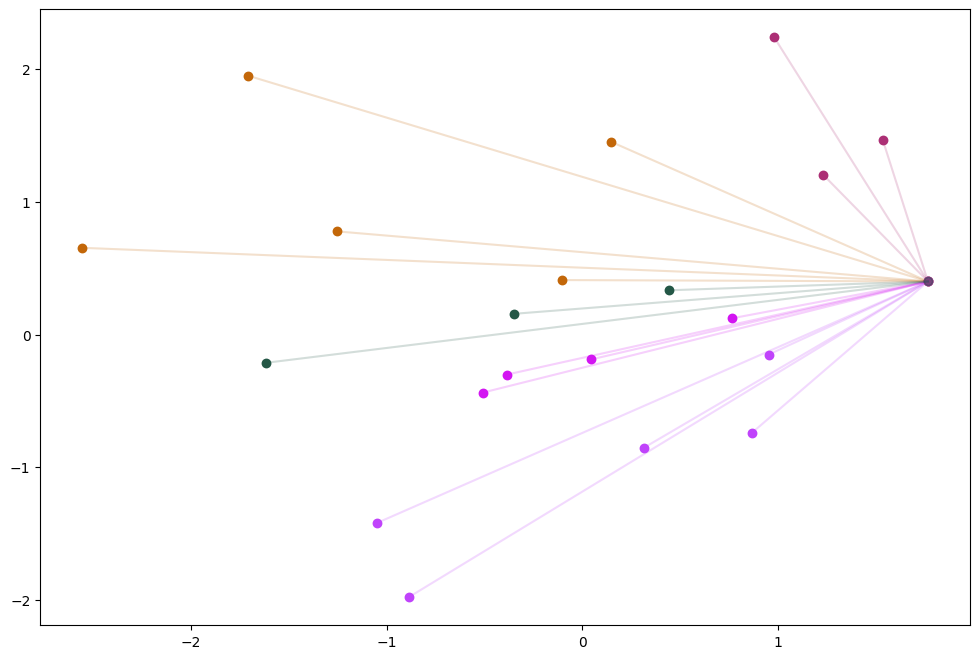

In [6]:
np.random.seed(0)

subgraphs = [G.subgraph(nodes) for _, nodes in partition.items()]

plt.figure(figsize=(12, 8))

for subgraph in subgraphs:
    r, g, b = np.random.randint(0, 256, size=3)
    color_hex = f'#{r:02x}{g:02x}{b:02x}'
    points_subset = [node for node in subgraph.nodes]
    for i in points_subset:
        plt.scatter(points[i, 0], points[i, 1], c=color_hex)
        # Edge
        x_coords = [points[central_id][0], points[i][0]]
        y_coords = [points[central_id][1], points[i][1]]
        plt.plot(x_coords, y_coords, marker='o', c=color_hex, alpha=0.2)

# Radial clustering

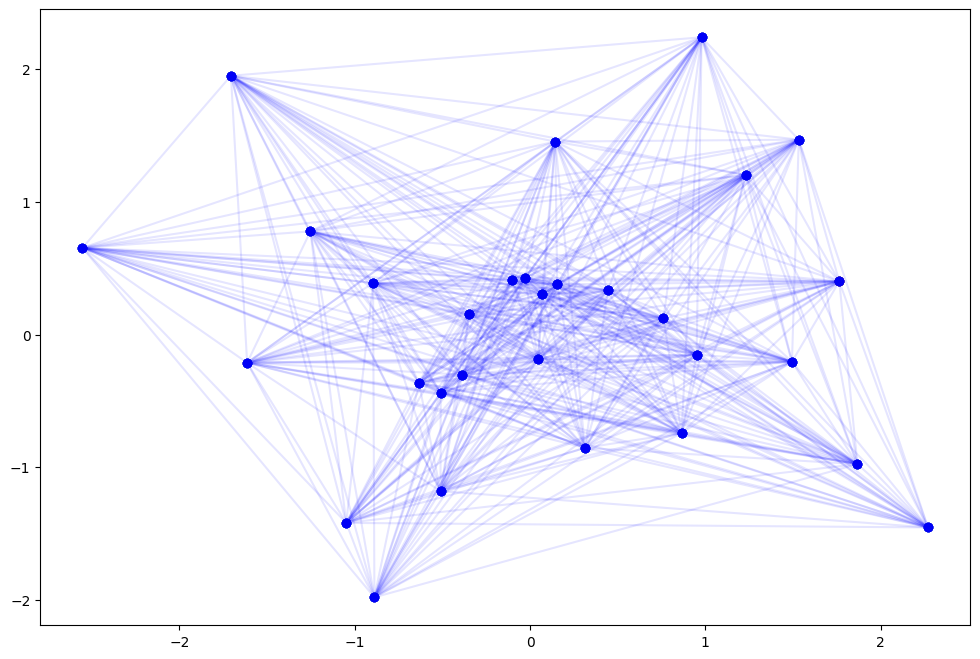

In [7]:
np.random.seed(0)

# Generate points
N = 30
link_prob = 0.8
points = np.random.randn(N, 2)
d_matrix = pairwise_distances(points)
# Null some edges
shape = (len(d_matrix), len(d_matrix))  
mask = np.random.rand(*shape) > link_prob
d_matrix[mask] = 0

# Build graph
G = nx.from_numpy_array(d_matrix)
for i, node in enumerate(G.nodes()):
    G.nodes[node]['x'] = points[i][0]
    G.nodes[node]['y'] = points[i][1]

central_id = next(iter(G.nodes))
end_points = [n for n in G.nodes if n != central_id]

# pos = nx.spring_layout(G)
# nx.draw(G, pos=pos)
# nx.draw_networkx_nodes(G, pos, nodelist=set([central_id]), node_color='r')

plt.figure(figsize=(12, 8))
plt.scatter(points[:,0], points[:,1])

for i, j in G.edges:
    x_coords = [points[i][0], points[j][0]]
    y_coords = [points[i][1], points[j][1]]
    plt.plot(x_coords, y_coords, marker='o', c='blue', alpha=0.1)

plt.scatter(points[central_id,0], points[central_id,1], c='r')

In [8]:
radial_clustering(G, central_id, len_attrbute='weight')
partition = {}

for node in [node for node, data in G.nodes(data=True) if 'radial_cluster' in data]:
    label = G.nodes[node]['radial_cluster']
    if label != -1:
        if label in partition:
            partition[label].append(node)
        else:
            partition[label] = [node]

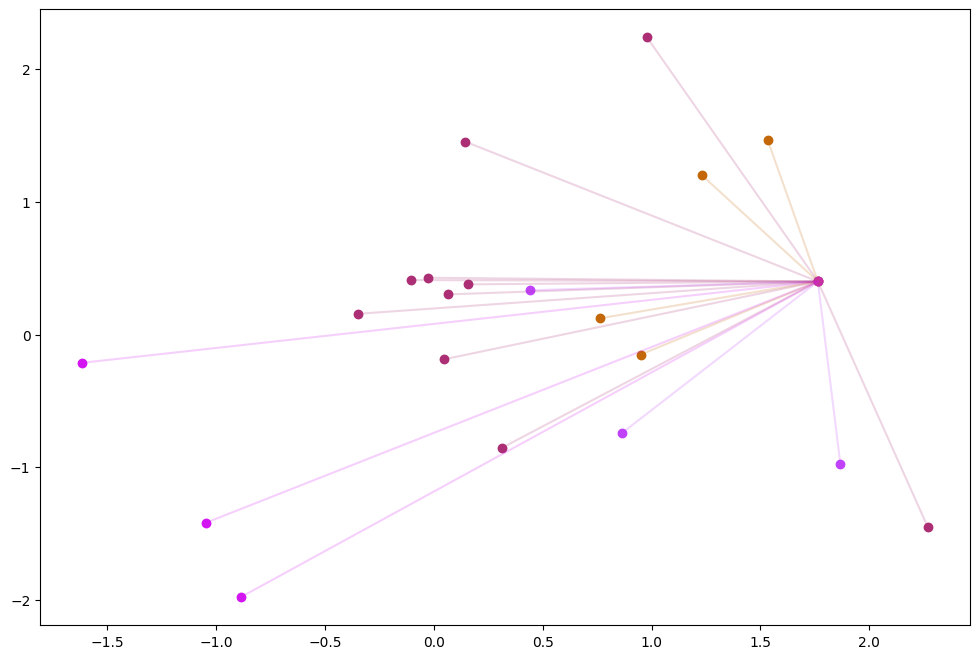

In [9]:
np.random.seed(0)

# plt.figure(figsize=(12, 8))
subgraphs = [G.subgraph(nodes) for _, nodes in partition.items()]

plt.figure(figsize=(12, 8))

for subgraph in subgraphs:
    r, g, b = np.random.randint(0, 256, size=3)
    color_hex = f'#{r:02x}{g:02x}{b:02x}'
    points_subset = [node for node in subgraph.nodes]
    for i in points_subset:
        plt.scatter(points[i, 0], points[i, 1], c=color_hex)
        # Edge
        x_coords = [points[central_id][0], points[i][0]]
        y_coords = [points[central_id][1], points[i][1]]
        plt.plot(x_coords, y_coords, marker='o', c=color_hex, alpha=0.2)

# Spherical medoids

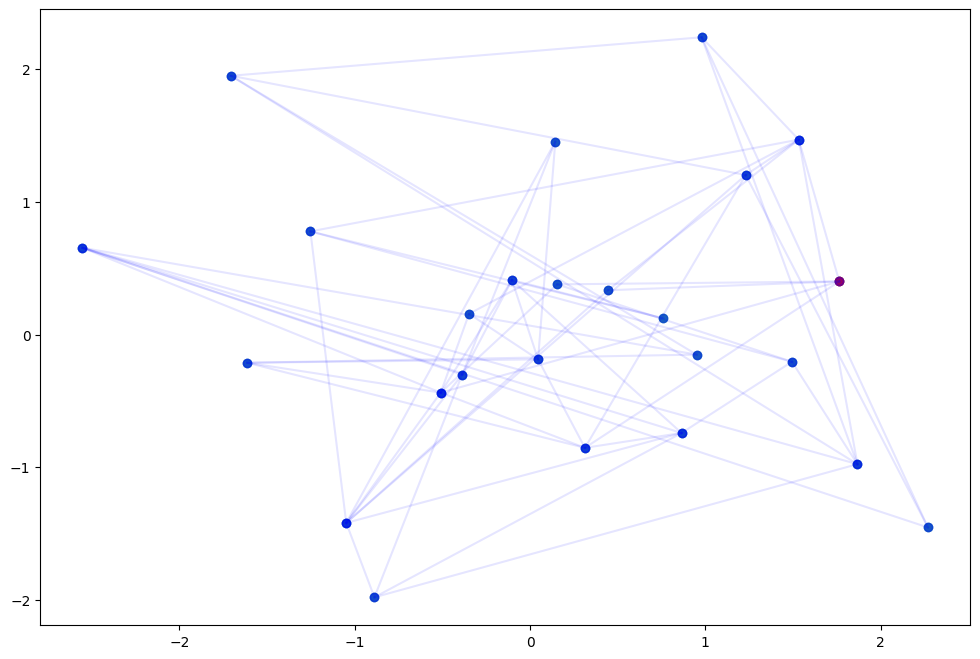

In [10]:
np.random.seed(0)

# Generate points
N = 25
link_prob = 0.1
points = np.random.randn(N, 2)
d_matrix = pairwise_distances(points)
# Null some edges
shape = (len(d_matrix), len(d_matrix))  
mask = np.random.rand(*shape) > link_prob
d_matrix[mask] = 0

# Build graph
G = nx.from_numpy_array(d_matrix)
for i, node in enumerate(G.nodes()):
    G.nodes[node]['x'] = points[i][0]
    G.nodes[node]['y'] = points[i][1]

central_id = next(iter(G.nodes))
end_points = [n for n in G.nodes if n != central_id]

plt.figure(figsize=(12, 8))
plt.scatter(points[:,0], points[:,1])

for i, j in G.edges:
    x_coords = [points[i][0], points[j][0]]
    y_coords = [points[i][1], points[j][1]]
    plt.plot(x_coords, y_coords, marker='o', c='blue', alpha=0.1)

plt.scatter(points[central_id,0], points[central_id,1], c='r')

In [11]:
np.random.seed(0)

subgraphs = spherical_medoids(G, central_id, end_points)
partition = {}

for node in end_points:
    label = G.nodes[node]['spherical_cluster']
    if label != -1:
        if label in partition:
            partition[label].append(node)
        else:
            partition[label] = [node]

/Users/marioauditore/Desktop/Sber/Ride/examples/../ride_pfa/heuristics.py:123: RuntimeWarning: invalid value encountered in arccos
  d_matrix = np.arccos(vectors @ vectors.T)


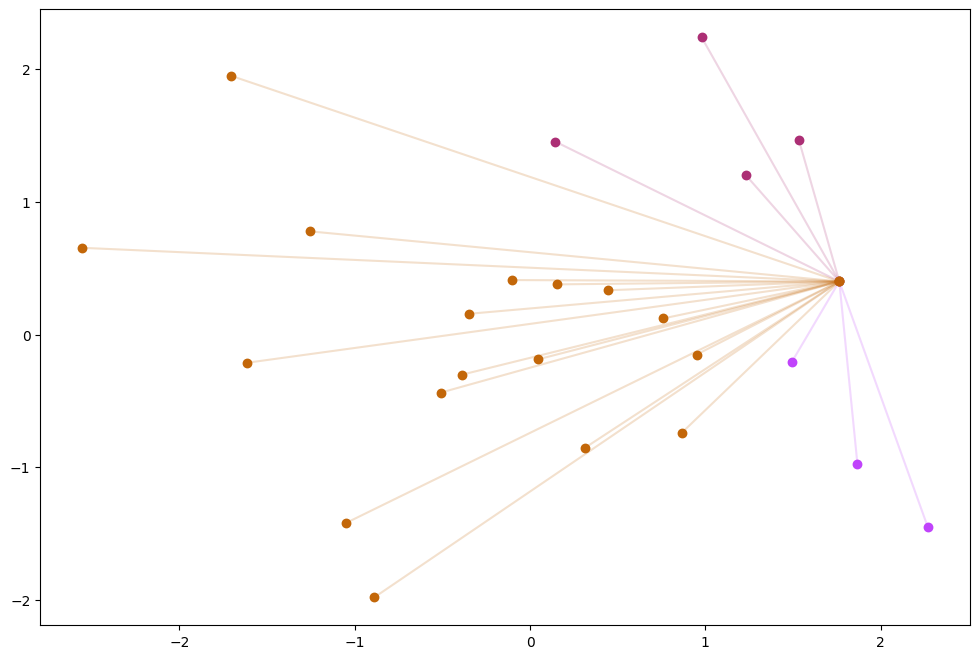

In [12]:
np.random.seed(0)

subgraphs = [G.subgraph(nodes) for _, nodes in partition.items()]

plt.figure(figsize=(12, 8))

for subgraph in subgraphs:
    r, g, b = np.random.randint(0, 256, size=3)
    color_hex = f'#{r:02x}{g:02x}{b:02x}'
    points_subset = [node for node in subgraph.nodes]
    for i in points_subset:
        plt.scatter(points[i, 0], points[i, 1], c=color_hex)
        # Edge
        x_coords = [points[central_id][0], points[i][0]]
        y_coords = [points[central_id][1], points[i][1]]
        plt.plot(x_coords, y_coords, marker='o', c=color_hex, alpha=0.2)

# Exception
Нет аттрибута `'y'` у графа 

In [13]:
np.random.seed(0)

# Generate points
N = 25
link_prob = 0.1
points = np.random.randn(N, 2)
d_matrix = pairwise_distances(points)
# Null some edges
shape = (len(d_matrix), len(d_matrix))  
mask = np.random.rand(*shape) > link_prob
d_matrix[mask] = 0

# Build graph
G = nx.from_numpy_array(d_matrix)
for i, node in enumerate(G.nodes()):
    G.nodes[node]['x'] = points[i][0]
    # G.nodes[node]['y'] = points[i][1]

central_id = next(iter(G.nodes))
end_points = [n for n in G.nodes if n != central_id]


In [14]:
try:
    angle_clustering(G, central_id, end_points)
except Exception as e:
    print(e, type(e), sep='\n')

Graph node does not contain attribute 'y'
<class 'ride_pfa.heuristics.GraphAttributeError'>
